In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
imgo = cv2.imread('bg1')

# Resize the image
height, width = imgo.shape[:2]
imgo = cv2.resize(imgo, (int(width*0.7), int(height*0.7)), interpolation=cv2.INTER_AREA)
imgo = cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)

# Create a mask holder
mask = np.zeros(imgo.shape[:2], np.uint8)

# GrabCut the object
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Hard coding the rectangle. The object must lie within this rect.
rect = (10, 10, width-30, height-30)
cv2.grabCut(imgo, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img1 = imgo * mask[:, :, np.newaxis]

# Get the background
background = imgo - img1

# Change all pixels in the background that are not black to white
background[np.where((background > [0, 0, 0]).all(axis=2))] = [255, 255, 255]

# Add the background and the image
final = background + img1

# Smoothening the edges (optional)
# Code for smoothening can be added here if needed

# Plotting the results
fig = plt.figure()
fig.set_figwidth(18)
a = fig.add_subplot(1, 2, 1)
a.set_title('Original Image')
plt.imshow(imgo)
plt.axis('off')
a = fig.add_subplot(1, 2, 2)
a.set_title('Background Removed')
plt.imshow(final)
plt.axis('off')
plt.show()


AttributeError: 'NoneType' object has no attribute 'shape'

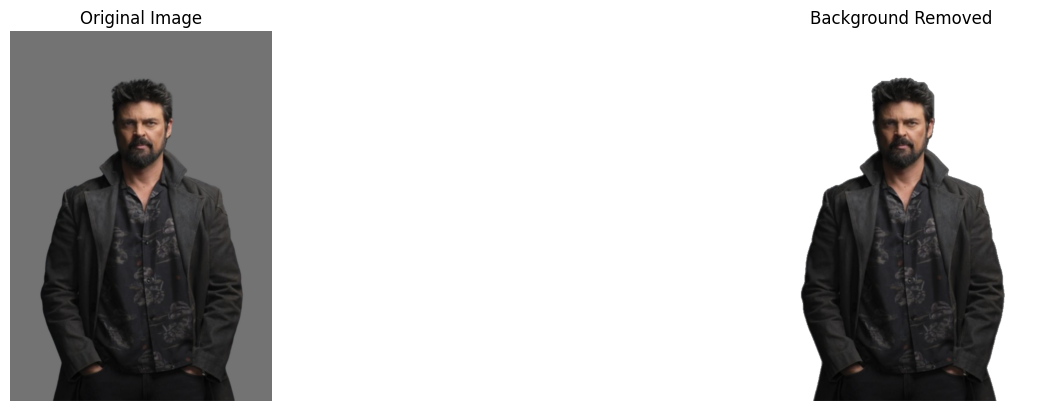

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgo = cv2.imread('billybutcher.png')

height, width = imgo.shape[:2]
imgo = cv2.resize(imgo, (int(width*0.7), int(height*0.7)), interpolation=cv2.INTER_AREA)
imgo = cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)

mask = np.zeros(imgo.shape[:2], np.uint8)

rect = (10, 10, width-20, height-20)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv2.grabCut(imgo, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

kernel = np.ones((3, 3), np.uint8)
mask2 = cv2.erode(mask2, kernel, iterations=1)
mask2 = cv2.dilate(mask2, kernel, iterations=1)

img1 = imgo * mask2[:, :, np.newaxis]

background = imgo - img1
background[np.where((background > [0, 0, 0]).all(axis=2))] = [255, 255, 255]

final = background + img1

fig = plt.figure()
fig.set_figwidth(18)
a = fig.add_subplot(1, 2, 1)
a.set_title('Original Image')
plt.imshow(imgo)
plt.axis('off')
a = fig.add_subplot(1, 2, 2)
a.set_title('Background Removed')
plt.imshow(final)
plt.axis('off')
plt.show()


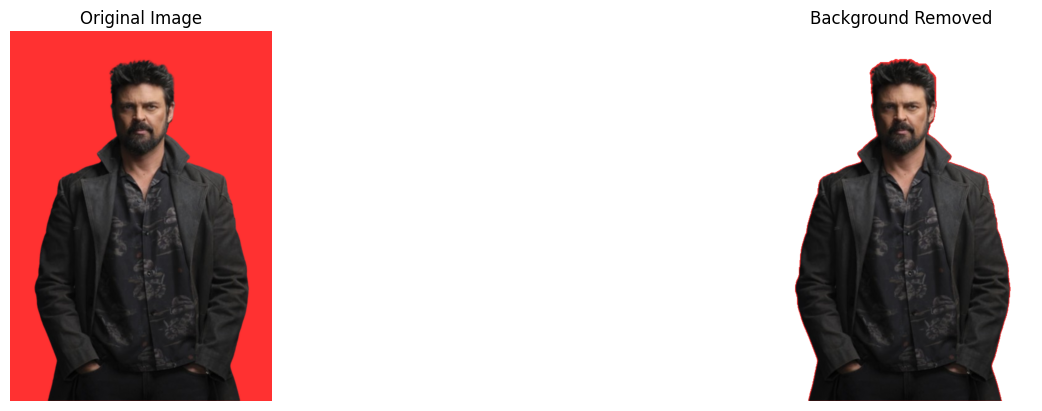

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgo = cv2.imread('bg1.png')

height, width = imgo.shape[:2]
imgo = cv2.resize(imgo, (int(width*0.7), int(height*0.7)), interpolation=cv2.INTER_AREA)
imgo = cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)

mask = np.zeros(imgo.shape[:2], np.uint8)

rect = (10, 10, width-20, height-20)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv2.grabCut(imgo, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

kernel = np.ones((3, 3), np.uint8)
mask2 = cv2.erode(mask2, kernel, iterations=1)
mask2 = cv2.dilate(mask2, kernel, iterations=1)

img1 = imgo * mask2[:, :, np.newaxis]

background = imgo - img1
background[np.where((background > [0, 0, 0]).all(axis=2))] = [255, 255, 255]

final = background + img1

# Plotting the results
fig = plt.figure()
fig.set_figwidth(18)
a = fig.add_subplot(1, 2, 1)
a.set_title('Original Image')
plt.imshow(imgo)
plt.axis('off')
a = fig.add_subplot(1, 2, 2)
a.set_title('Background Removed')
plt.imshow(final)
plt.axis('off')
plt.show()


Enter the red value (0-255) for the background:  5
Enter the green value (0-255) for the background:  45
Enter the blue value (0-255) for the background:  67


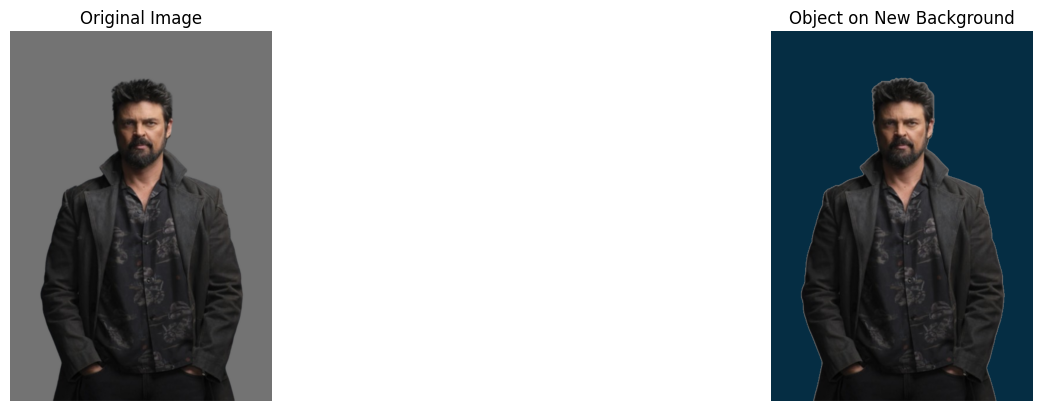

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
imgo = cv2.imread('billybutcher.png')

# Resize the image
height, width = imgo.shape[:2]
imgo = cv2.resize(imgo, (int(width*0.7), int(height*0.7)), interpolation=cv2.INTER_AREA)
imgo = cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)

# Create a mask holder
mask = np.zeros(imgo.shape[:2], np.uint8)

# Hard coding the rectangle. The object must lie within this rect.
rect = (10, 10, width-20, height-20)

# GrabCut the object
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv2.grabCut(imgo, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Refine the mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply morphological operations to clean up the mask
kernel = np.ones((3, 3), np.uint8)
mask2 = cv2.erode(mask2, kernel, iterations=1)
mask2 = cv2.dilate(mask2, kernel, iterations=1)

# Extract the object
img1 = imgo * mask2[:, :, np.newaxis]

# Prompt user for the desired background color
r = int(input("Enter the red value (0-255) for the background: "))
g = int(input("Enter the green value (0-255) for the background: "))
b = int(input("Enter the blue value (0-255) for the background: "))
background_color = [r, g, b]

# Create a new background with the desired color
new_background = np.full(imgo.shape, background_color, dtype=np.uint8)

# Place the object on the new background
result = np.where(mask2[:, :, np.newaxis] == 1, img1, new_background)

# Plotting the results
fig = plt.figure()
fig.set_figwidth(18)
a = fig.add_subplot(1, 2, 1)
a.set_title('Original Image')
plt.imshow(imgo)
plt.axis('off')
a = fig.add_subplot(1, 2, 2)
a.set_title('Object on New Background')
plt.imshow(result)
plt.axis('off')
plt.show()


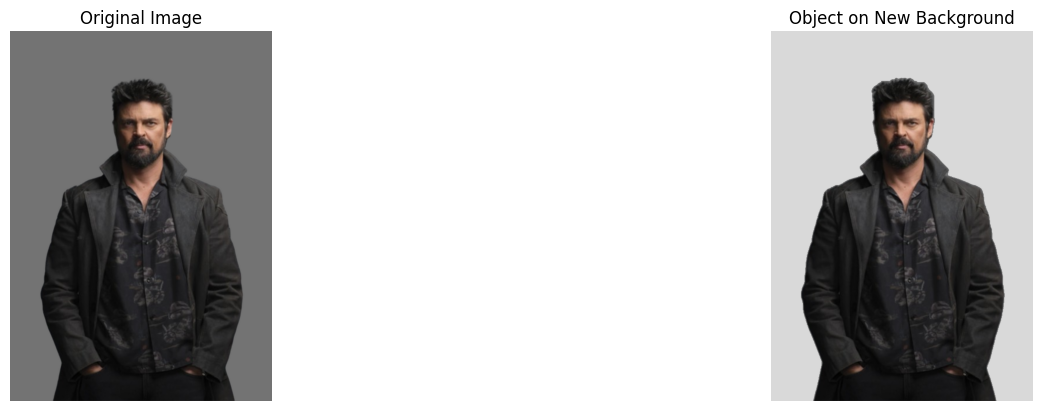

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
main_image_path = 'billybutcher.png'
background_image_path = 'bg2.png'  # Replace with the path to your background image

imgo = cv2.imread(main_image_path)
background_img = cv2.imread(background_image_path)

# Resize the main image
height, width = imgo.shape[:2]
imgo = cv2.resize(imgo, (int(width*0.7), int(height*0.7)), interpolation=cv2.INTER_AREA)
imgo = cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)

# Resize the background image to match the size of the main image
background_img = cv2.resize(background_img, (imgo.shape[1], imgo.shape[0]))

# Create a mask holder
mask = np.zeros(imgo.shape[:2], np.uint8)

# Hard coding the rectangle. The object must lie within this rect.
rect = (10, 10, width-20, height-20)

# GrabCut the object
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv2.grabCut(imgo, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Refine the mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply morphological operations to clean up the mask
kernel = np.ones((3, 3), np.uint8)
mask2 = cv2.erode(mask2, kernel, iterations=1)
mask2 = cv2.dilate(mask2, kernel, iterations=1)

# Extract the object
img1 = imgo * mask2[:, :, np.newaxis]

# Place the object on the new background
result = np.where(mask2[:, :, np.newaxis] == 1, img1, background_img)

# Plotting the results
fig = plt.figure()
fig.set_figwidth(18)
a = fig.add_subplot(1, 2, 1)
a.set_title('Original Image')
plt.imshow(imgo)
plt.axis('off')
a = fig.add_subplot(1, 2, 2)
a.set_title('Object on New Background')
plt.imshow(result)
plt.axis('off')
plt.show()

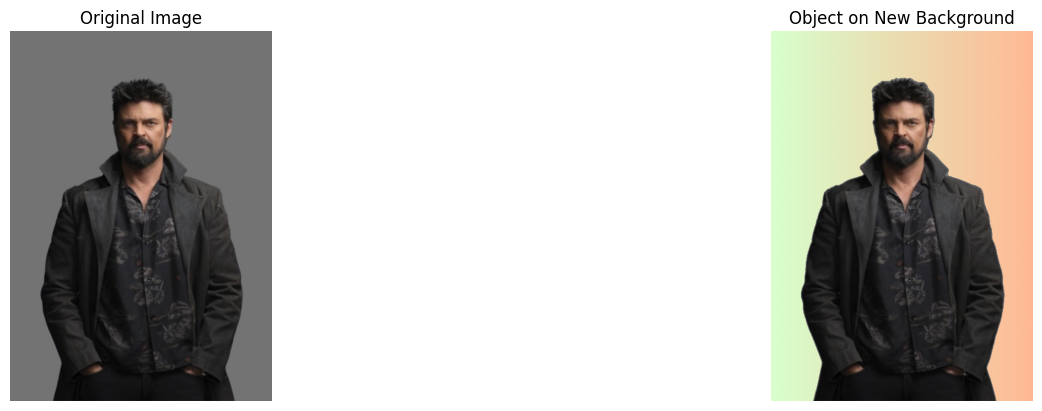

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
main_image_path = 'billybutcher.png'
background_image_path = 'background.png'  # Replace with the path to your background image

imgo = cv2.imread(main_image_path)
background_img = cv2.imread(background_image_path)

# Resize the main image
height, width = imgo.shape[:2]
imgo = cv2.resize(imgo, (int(width*0.7), int(height*0.7)), interpolation=cv2.INTER_AREA)
imgo = cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)

# Resize the background image to match the size of the main image
background_img = cv2.resize(background_img, (imgo.shape[1], imgo.shape[0]))

# Create a mask holder
mask = np.zeros(imgo.shape[:2], np.uint8)

# Hard coding the rectangle. The object must lie within this rect.
rect = (10, 10, width-20, height-20)

# GrabCut the object
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv2.grabCut(imgo, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Refine the mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply morphological operations to clean up the mask
kernel = np.ones((3, 3), np.uint8)
mask2 = cv2.erode(mask2, kernel, iterations=1)
mask2 = cv2.dilate(mask2, kernel, iterations=1)

# Extract the object
img1 = imgo * mask2[:, :, np.newaxis]

# Place the object on the new background
result = np.where(mask2[:, :, np.newaxis] == 1, img1, background_img)

# Plotting the results
fig = plt.figure()
fig.set_figwidth(18)
a = fig.add_subplot(1, 2, 1)
a.set_title('Original Image')
plt.imshow(imgo)
plt.axis('off')
a = fig.add_subplot(1, 2, 2)
a.set_title('Object on New Background')
plt.imshow(result)
plt.axis('off')
plt.show()

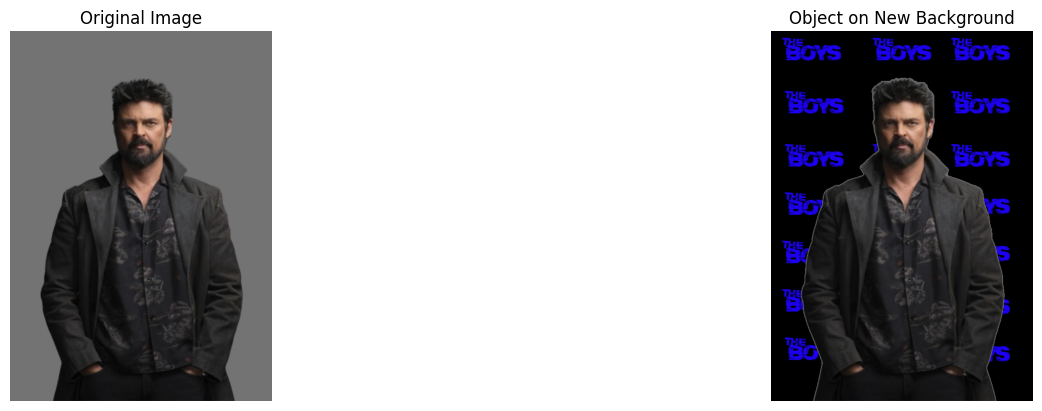

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
main_image_path = 'billybutcher.png'
background_image_path = 'bg3.png'  # Replace with the path to your background image

imgo = cv2.imread(main_image_path)
background_img = cv2.imread(background_image_path)

# Resize the main image
height, width = imgo.shape[:2]
imgo = cv2.resize(imgo, (int(width*0.7), int(height*0.7)), interpolation=cv2.INTER_AREA)
imgo = cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)

# Resize the background image to match the size of the main image
background_img = cv2.resize(background_img, (imgo.shape[1], imgo.shape[0]))

# Create a mask holder
mask = np.zeros(imgo.shape[:2], np.uint8)

# Hard coding the rectangle. The object must lie within this rect.
rect = (10, 10, width-20, height-20)

# GrabCut the object
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv2.grabCut(imgo, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Refine the mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply morphological operations to clean up the mask
kernel = np.ones((3, 3), np.uint8)
mask2 = cv2.erode(mask2, kernel, iterations=1)
mask2 = cv2.dilate(mask2, kernel, iterations=1)

# Extract the object
img1 = imgo * mask2[:, :, np.newaxis]

# Place the object on the new background
result = np.where(mask2[:, :, np.newaxis] == 1, img1, background_img)

# Plotting the results
fig = plt.figure()
fig.set_figwidth(18)
a = fig.add_subplot(1, 2, 1)
a.set_title('Original Image')
plt.imshow(imgo)
plt.axis('off')
a = fig.add_subplot(1, 2, 2)
a.set_title('Object on New Background')
plt.imshow(result)
plt.axis('off')
plt.show()

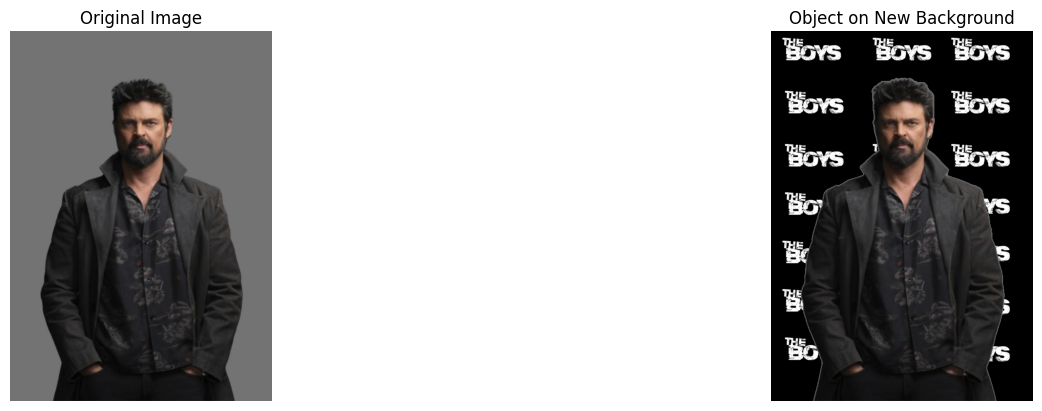

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
main_image_path = 'billybutcher.png'
background_image_path = 'bg4.png'  # Replace with the path to your background image

imgo = cv2.imread(main_image_path)
background_img = cv2.imread(background_image_path)

# Resize the main image
height, width = imgo.shape[:2]
imgo = cv2.resize(imgo, (int(width*0.7), int(height*0.7)), interpolation=cv2.INTER_AREA)
imgo = cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)

# Resize the background image to match the size of the main image
background_img = cv2.resize(background_img, (imgo.shape[1], imgo.shape[0]))

# Create a mask holder
mask = np.zeros(imgo.shape[:2], np.uint8)

# Hard coding the rectangle. The object must lie within this rect.
rect = (10, 10, width-20, height-20)

# GrabCut the object
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv2.grabCut(imgo, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Refine the mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply morphological operations to clean up the mask
kernel = np.ones((3, 3), np.uint8)
mask2 = cv2.erode(mask2, kernel, iterations=1)
mask2 = cv2.dilate(mask2, kernel, iterations=1)

# Extract the object
img1 = imgo * mask2[:, :, np.newaxis]

# Place the object on the new background
result = np.where(mask2[:, :, np.newaxis] == 1, img1, background_img)

# Plotting the results
fig = plt.figure()
fig.set_figwidth(18)
a = fig.add_subplot(1, 2, 1)
a.set_title('Original Image')
plt.imshow(imgo)
plt.axis('off')
a = fig.add_subplot(1, 2, 2)
a.set_title('Object on New Background')
plt.imshow(result)
plt.axis('off')
plt.show()